# Final Project Report

* Class: DS 5100
* Student Name: Sarah Christen
* Student Net ID: sc8rg
* This URL: a URL to the notebook source of this document

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL:https://github.com/sarahsiggins/Monte_Carlo_Module

Paste a copy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

```

import pandas as pd
import numpy as np
import random

class Die:
    '''
    The Die object takes a numpy array to create a die. 
    Each value in the input array becomes a face of the created die. Each face must have a unique value.
    The die initally created will be "fair" (each side has a weight on 1).
    '''
    def __init__(self,faces):
        '''
        Parameters
        ----------
        faces : numpy array
            The inputted array should be a data type of strings or numbers.
        
        Raises
        ------
        TypeError
            if faces input is not a numpy array
        ValueError
            if faces array does not contain unique values
        '''
        if not isinstance(faces, np.ndarray):
            raise TypeError("Faces array must be a NumPy array")      
        if len(np.unique(faces)) != len(faces):
            raise ValueError("Faces array contains non-distinct values.")        
        self.faces = faces
        self.weights = np.full(np.shape(self.faces),1)
        self._face_weight = pd.DataFrame({'faces':self.faces,'weights':self.weights})
        self._face_weight = self._face_weight.set_index(['faces'])
    
    def change_weight(self,change_face,new_weight):
        '''
        A method to change the weight of a single side.

        Parameters
        ----------
        change_face : str or number
            selected face to change weight of
        new_weight : number
            the new weight of the chosen face

        Raises
        ------
        IndexError
            if change_face inputted is not a face contained in the die array
        ValueError
            if new_weight is not a number

        Returns
        -------
        None
        '''
        if not (change_face in list(self._face_weight.index)):
            raise IndexError("That face is not a valid value. It is not in the die array.")
        if not isinstance(new_weight, (int, float)):
            raise TypeError("New weight value must be a number")
        else:
            self._face_weight.loc[change_face]= new_weight
        
    def roll_die(self,n_rolls = 1):
        '''
        A method to roll the die.

        Parameters
        ----------
        n_rolls: number
            number of times to roll die
            defaults to 1

        Returns
        -------
        results: list
            Results of die rolls
        '''
        results = random.choices(self._face_weight.index.values, weights=self._face_weight["weights"].values, k=n_rolls)
        return results        
    
    def die_current_state(self):
        '''
        A method to show the die’s current state.

        Parameters
        ----------
        None

        Returns
        -------
        _face_weight: private dataframe
            current faces and weights of die
        '''
        return self._face_weight


class Game:
    '''
    The Game object takes in a list of die to make a game. 
    A game consists of rolling of one or more dice (Die objects) one or more times.
    '''
    
    def __init__(self,die_list):
        '''
        Parameters
        ----------
        die_list : list
            list containing objects of the Die type
        '''     
        self.die_list = die_list
        self._played_games = pd.DataFrame()
        
    def play(self,n_rolls):
        '''
        A method to play the game, roll each die for a given amount of rolls.

        Parameters
        ----------
        n_rolls: number
            number of rolls or times to play the game

        Returns
        -------
        None
        '''     
        self._played_games = pd.DataFrame()
        x = 0
        
        for i in range(len(self.die_list)):
            new_result = pd.DataFrame(self.die_list[i].roll_die(n_rolls))
            new_result.index = [x+1 for x in range(n_rolls)]
            new_result.index.name = "Roll Number"
            new_result.columns = [i+1]
            new_result.columns.name = "Die Number"
            self._played_games = pd.concat([self._played_games,new_result],axis = 1)
            
    def show_previous_result(self,form = "wide"):
        '''
        A method to show the user the results of the most recent play.

        Parameters
        ----------
        form: str; "narrow" or "wide"
            format to view results; defaults to "wide"
        
        Raises
        ------
        ValueError
            if the value of form is not "narrow" or "wide"
        
        Returns
        -------
        _played_games: dataframe
            dataframe of the most recent result from the play method 
            
        '''  
        if not (form == "wide" or form == "narrow"):
            raise ValueError("Invalid form input, must be wide or narrow")
        elif form == "wide":
            return self._played_games
        elif form == "narrow":
            return self._played_games.stack().to_frame("Face Rolled")

class Analyzer:
    '''
    The Analyzer object takes the results of a single game and computes various descriptive statistical properties about it.
    '''
    
    def __init__(self,game):
        '''
        Parameters
        ----------
        game : object
            game is a Game object
        
        Raises
        ------
        ValueError
            if game is not an object
        '''        
        if not isinstance(game, Game):
            raise ValueError("Game input must be a Game object") 
        self.game = game

    def jackpot(self):
        '''
        A method to compute how many times the game resulted in a jackpot.
        
        Parameters
        ----------
        None
        
        Returns
        -------
        jp_count: dataframe
            number of jackpots in the game
        '''
        self.jp_df = pd.DataFrame()
        for i in range(1,self.game.show_previous_result().T.shape[1]+1):
            if ((len(set(self.game.show_previous_result().loc[[i]].values[0].flatten())))==1):
                temp = self.game.show_previous_result().loc[[i]]
                self.jp_df = pd.concat([self.jp_df, temp], axis=0)
        self.jp_count = int(self.jp_df.shape[0])
        return self.jp_count
    
    def face_counts(self):
        '''
        A method to compute how many times a given face is rolled in each game.
        
        Parameters
        ----------
        None
        
        Returns
        -------
        counts_df: dataframe
            has an index of the roll number, face values as columns, and count values in the cells
        '''
        self.face_counts = self.game.show_previous_result().apply(lambda x: x.value_counts(), axis = 1).fillna(int(0))
        self.counts_df = self.face_counts
        self.counts_df.index.name = 'Roll'
        self.counts_df.columns.name = "Die Face"
        return self.counts_df
    
    def combo_count(self):
        '''
        A method to compute the distinct combinations of faces rolled, along with their counts. 
        Combinations are order-independent and may contain repetitions
        
        Parameters
        ----------
        None
        
        Returns
        -------
        combo_df: dataframe
            has a MultiIndex of distinct combinations and a column for the associated counts
        '''       
        self.combo_df = pd.DataFrame()
        self.combo_df = self.game.show_previous_result().apply(lambda x: pd.Series(sorted(x)), 1).value_counts().to_frame('Occurrence')
        self.combo_df.index.names = ["Face Value #"+str(i) for i in range(1, len(self.game.die_list)+1)]
        return self.combo_df
    
    def perm_count(self):
        '''
        A method to compute the distinct permutations of faces rolled, along with their counts. 
        Permutations are order-dependent and may contain repetitions.
        
        Parameters
        ----------
        None
        
        Returns
        -------
        dataframe
            has a MultiIndex of distinct permutations and a column for the associated counts.
        '''   
        self.perm_df = pd.DataFrame()
        new_names = ["#"+str(i)+" die's value" for i in range(1, len(self.game.die_list)+1)]
        temp_df = self.game.show_previous_result()
        temp_df.columns = new_names
        x = list(range(len(self.game.die_list)))
        return temp_df.set_index(new_names).sort_index().groupby(level=x).size().to_frame("Occurence")
        
```

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

```

import unittest
import montecarlo
import pandas as pd
import numpy as np

class MonteCarloTestSuite(unittest.TestCase):
    
    def test_die_init(self): 
        self.assertRaises(TypeError, montecarlo.Die,int(3))
        
    def test_die_change_weight(self):
        coin = montecarlo.Die(np.array(["H", "T"]))
        coin.change_weight("H", 5)
        change_test = coin.die_current_state().loc['H'][0]
        expected = 5
        self.assertEqual(change_test, expected)
                
    def test_die_roll_die(self): 
        coin = montecarlo.Die(np.array(["H", "T"]))
        num_rolls = 5
        num_roll_test = len(coin.roll_die(n_rolls = 5))
        self.assertEqual(num_roll_test, num_rolls)
        
    def test_die_die_current_state(self): 
        coin = montecarlo.Die(np.array(["H", "T"]))
        df = coin.die_current_state()
        curr_state = isinstance(df, pd.DataFrame)
        self.assertTrue(curr_state)        

    def test_game_init(self): 
        coin = montecarlo.Die(np.array(["H", "T"]))
        game = montecarlo.Game(die_list = [coin, coin]) 
        game_init = isinstance(game, object)
        self.assertTrue(game_init)    
        
    def test_game_play(self): 
        coin = montecarlo.Die(np.array(["H", "T"]))
        game = montecarlo.Game(die_list = [coin, coin]) 
        game.play(n_rolls = 10)
        game_play = isinstance(game._played_games, pd.DataFrame)
        self.assertTrue(game_play)
        
    def test_game_show_previous_result(self): 
        coin = montecarlo.Die(np.array(["H", "T"]))
        game = montecarlo.Game(die_list = [coin, coin]) 
        game.play(n_rolls = 10)
        self.assertRaises(ValueError, game.show_previous_result,"test")

    def test_analyzer_init(self): 
        self.assertRaises(ValueError, montecarlo.Analyzer,str("test"))
        
    def test_analyzer_jackpot(self): 
        coin = montecarlo.Die(np.array(["H", "T"]))
        game = montecarlo.Game(die_list = [coin, coin]) 
        analyzer = montecarlo.Analyzer(game)
        analyzer_jackpot = isinstance(analyzer.jackpot(), int)
        self.assertTrue(analyzer_jackpot)

    def test_analyzer_face_counts(self): 
        coin = montecarlo.Die(np.array(["H", "T"]))
        game = montecarlo.Game(die_list = [coin, coin]) 
        analyzer = montecarlo.Analyzer(game)
        analyzer_face_counts = isinstance(analyzer.face_counts(), pd.DataFrame)
        self.assertTrue(analyzer_face_counts)
        
    def test_analyzer_combo_count(self): 
        coin = montecarlo.Die(np.array(["H", "T"]))
        game = montecarlo.Game(die_list = [coin, coin]) 
        game.play(n_rolls = 10)
        analyzer = montecarlo.Analyzer(game)
        analyzer_combo_count = isinstance(analyzer.combo_count(), pd.DataFrame)
        self.assertTrue(analyzer_combo_count)
        
    def test_analyzer_perm_count(self): 
        coin = montecarlo.Die(np.array(["H", "T"]))
        game = montecarlo.Game(die_list = [coin, coin]) 
        game.play(n_rolls = 10)
        analyzer = montecarlo.Analyzer(game)
        analyzer_perm_count = isinstance(analyzer.perm_count(), pd.DataFrame)
        self.assertTrue(analyzer_perm_count)
        
                
if __name__ == '__main__':
    
    unittest.main(verbosity=3)

```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

``` 

test_analyzer_combo_count (__main__.MonteCarloTestSuite.test_analyzer_combo_count) ... ok
test_analyzer_face_counts (__main__.MonteCarloTestSuite.test_analyzer_face_counts) ... ok
test_analyzer_init (__main__.MonteCarloTestSuite.test_analyzer_init) ... ok
test_analyzer_jackpot (__main__.MonteCarloTestSuite.test_analyzer_jackpot) ... ok
test_analyzer_perm_count (__main__.MonteCarloTestSuite.test_analyzer_perm_count) ... ok
test_die_change_weight (__main__.MonteCarloTestSuite.test_die_change_weight) ... ok
test_die_die_current_state (__main__.MonteCarloTestSuite.test_die_die_current_state) ... ok
test_die_init (__main__.MonteCarloTestSuite.test_die_init) ... ok
test_die_roll_die (__main__.MonteCarloTestSuite.test_die_roll_die) ... ok
test_game_init (__main__.MonteCarloTestSuite.test_game_init) ... ok
test_game_play (__main__.MonteCarloTestSuite.test_game_play) ... ok
test_game_show_previous_result (__main__.MonteCarloTestSuite.test_game_show_previous_result) ... ok

----------------------------------------------------------------------
Ran 12 tests in 0.016s

OK

```

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [1]:
import montecarlo

Monte Carlo Package Successfully Imported


In [2]:
from montecarlo import montecarlo

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [3]:
help(montecarlo)

Help on module montecarlo.montecarlo in montecarlo:

NAME
    montecarlo.montecarlo

CLASSES
    builtins.object
        Analyzer
        Die
        Game
    
    class Analyzer(builtins.object)
     |  Analyzer(game)
     |  
     |  The Analyzer object takes the results of a single game and computes various descriptive statistical properties about it.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, game)
     |      Parameters
     |      ----------
     |      game : object
     |          game is a Game object
     |      
     |      Raises
     |      ------
     |      ValueError
     |          if game is not an object
     |  
     |  combo_count(self)
     |      A method to compute the distinct combinations of faces rolled, along with their counts. 
     |      Combinations are order-independent and may contain repetitions
     |      
     |      Parameters
     |      ----------
     |      None
     |      
     |      Returns
     |      -------
 

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/sarahsiggins/Monte_Carlo_Module/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

In [4]:
pip install -e .

Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///sfs/gpfs/tardis/home/sc8rg/Documents/MSDS/DS5100/DS5100_FinalProject
  Preparing metadata (setup.py) ... done
  Attempting uninstall: montecarlo
    Found existing installation: montecarlo 0.1
    Uninstalling montecarlo-0.1:
      Successfully uninstalled montecarlo-0.1
  Running setup.py develop for montecarlo
Note: you may need to restart the kernel to use updated packages.


# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
fair_coin = montecarlo.Die(np.array(["H", "T"]))
unfair_coin = montecarlo.Die(np.array(["H", "T"]))
unfair_coin.change_weight("H", 5)

Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [6]:
fair_game = montecarlo.Game(die_list = [fair_coin, fair_coin]) 
fair_game.play(n_rolls = 1000)

Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [7]:
unfair_game = montecarlo.Game(die_list = [unfair_coin,unfair_coin, fair_coin]) 
unfair_game.play(n_rolls = 1000)

Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [8]:
fair_analyzer = montecarlo.Analyzer(fair_game)
unfair_analyzer = montecarlo.Analyzer(unfair_game)
fair_analyzer.jackpot(), unfair_analyzer.jackpot()

(496, 364)

Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [9]:
rel_freq_jackpot_fair = fair_analyzer.jackpot() / 1000
rel_freq_jackpot_unfair = unfair_analyzer.jackpot() / 1000
rel_freq_jackpot_fair, rel_freq_jackpot_unfair

(0.496, 0.364)

Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

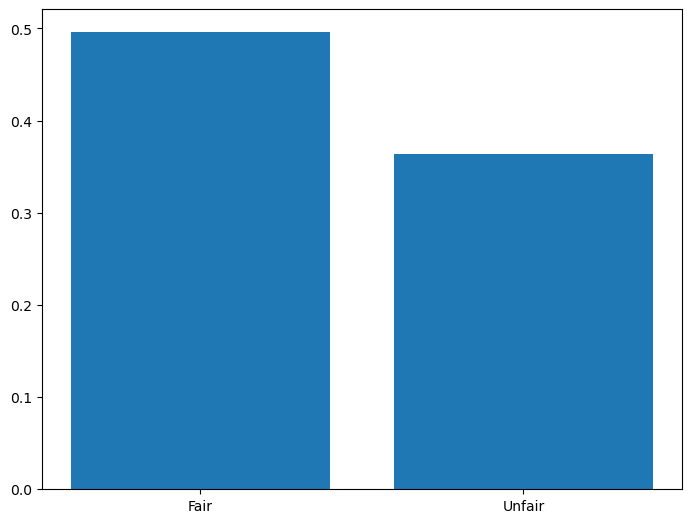

In [10]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
games = ["Fair", "Unfair"]
freq = [rel_freq_jackpot_fair, rel_freq_jackpot_unfair]
ax.bar(games, freq)
plt.show()

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [11]:
six_die_1 = montecarlo.Die(np.array([1,2,3,4,5,6]))
six_die_2 = montecarlo.Die(np.array([1,2,3,4,5,6]))
six_die_3 = montecarlo.Die(np.array([1,2,3,4,5,6]))

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [12]:
six_die_2.change_weight(6, 5)

Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [13]:
six_die_3.change_weight(1, 5)

Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [14]:
six_fair_game = montecarlo.Game(die_list = [six_die_1, six_die_1,six_die_1,six_die_1,six_die_1]) 
six_fair_game.play(n_rolls = 10000)

Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [15]:
six_unfair_game = montecarlo.Game(die_list = [six_die_1, six_die_1,six_die_1,six_die_2,six_die_3]) 
six_unfair_game.play(n_rolls = 10000)

Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

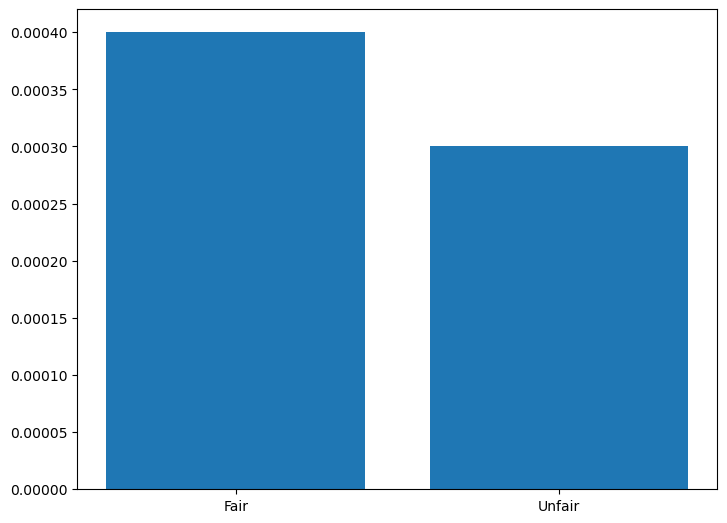

In [16]:
six_fair_analyzer = montecarlo.Analyzer(six_fair_game)
six_unfair_analyzer = montecarlo.Analyzer(six_unfair_game)
six_rel_freq_jackpot_fair = six_fair_analyzer.jackpot() / 10000
six_rel_freq_jackpot_unfair = six_unfair_analyzer.jackpot() / 10000
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
games = ["Fair", "Unfair"]
freq = [six_rel_freq_jackpot_fair, six_rel_freq_jackpot_unfair]
ax.bar(games, freq)
plt.show()

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [17]:
letters = np.loadtxt("english_letters.txt", dtype='str') 
alphabet_die = montecarlo.Die(letters[:,0])
for i in range(len(letters)):
    alphabet_die.change_weight(letters[i,0],float(letters[i,1]))

Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [18]:
letter_game = montecarlo.Game(die_list = [alphabet_die,alphabet_die,alphabet_die,alphabet_die]) 
letter_game.play(n_rolls = 1000)

Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [19]:
letter_analyzer = montecarlo.Analyzer(letter_game)
letter_combo = letter_analyzer.perm_count()
word = []
for i in range(len(letter_combo)):
    word.append("".join(list(letter_combo.iloc[i].name)))
game_words = np.array(word)
scrabble_words = np.loadtxt("scrabble_words.txt", dtype='str') 
actual_words_game = set(game_words).intersection(set(scrabble_words))
len(actual_words_game)

47

Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

A four dice game produced 47 actual words.
A five dice game produced 4 actual words.

In [20]:
letter_game_5 = montecarlo.Game(die_list = [alphabet_die,alphabet_die,alphabet_die,alphabet_die,alphabet_die]) 
letter_game_5.play(n_rolls = 1000)
letter_analyzer_5 = montecarlo.Analyzer(letter_game_5)
letter_combo_5 = letter_analyzer_5.perm_count()
word_5 = []
for i in range(len(letter_combo_5)):
    word_5.append("".join(list(letter_combo_5.iloc[i].name)))
game_words_5 = np.array(word_5)
actual_words_game_5 = set(game_words_5).intersection(set(scrabble_words))
len(actual_words_game_5)

4